Seeding the environment

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
# Set seed value
seed_value = 56
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# Libraries

In [3]:
import pandas as pd
import autoencoder as ae
from sklearn import preprocessing
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics.pairwise import euclidean_distances
import random

# Importing Data

In [4]:
dir = '/home/chayan/UMINT/data/'
rna = pd.read_csv(dir+'bmcite30k/bmcite30k_rna_scaled.csv',header = 0 , index_col= 0)
adt = pd.read_csv(dir+'bmcite30k/bmcite30k_adt_scaled.csv',header = 0 , index_col= 0)
labels = pd.read_csv(dir+'bmcite30k/bmcite30k_groundTruth.csv',header = 0 , index_col= 0)

x1 = rna.T
x2 = adt.T
y = labels

z = pd.concat([x1, x2], axis=1)

In [5]:
x1.head()

,HES4,ISG15,TNFRSF18,TNFRSF4,MRPL20,ATAD3A,PRDM16,SMIM1,ACOT7,ESPN,...,SRXN1,SLPI,CTXN1,IGLV9-49,IGLV5-48,IGLV7-43,IGLV3-27,SLC16A8,RP3-333H23.8,FAM19A5
a_AAACCTGAGCTTATCG-1,-0.078757,-0.390445,-0.111718,-0.153079,0.617982,-0.176082,-0.021664,2.939813,4.979018,-0.05104,...,-0.012595,-0.018368,-0.013759,-0.016088,-0.01393,-0.022088,-0.02177,-0.015401,-0.016619,-0.014287
a_AAACCTGAGGTGGGTT-1,-0.078757,-0.390445,-0.111718,-0.153079,-0.546178,-0.176082,-0.021664,-0.181047,-0.126231,-0.05104,...,-0.012595,-0.018368,-0.013759,-0.016088,-0.01393,-0.022088,-0.02177,-0.015401,-0.016619,-0.014287
a_AAACCTGAGTACATGA-1,-0.078757,-0.390445,-0.111718,-0.153079,-0.546178,-0.176082,-0.021664,-0.181047,-0.126231,-0.05104,...,-0.012595,-0.018368,-0.013759,-0.016088,-0.01393,-0.022088,-0.02177,-0.015401,-0.016619,-0.014287
a_AAACCTGCAAACCTAC-1,-0.078757,-0.390445,7.734547,-0.153079,1.573656,-0.176082,-0.021664,-0.181047,-0.126231,-0.05104,...,-0.012595,-0.018368,-0.013759,-0.016088,-0.01393,-0.022088,-0.02177,-0.015401,-0.016619,-0.014287
a_AAACCTGCAAGGTGTG-1,-0.078757,-0.390445,-0.111718,-0.153079,-0.546178,-0.176082,-0.021664,-0.181047,-0.126231,-0.05104,...,-0.012595,-0.018368,-0.013759,-0.016088,-0.01393,-0.022088,-0.02177,-0.015401,-0.016619,-0.014287


In [6]:
x2.head()

,CD11a,CD11c,CD123,CD127-IL7Ra,CD14,CD16,CD161,CD19,CD197-CCR7,CD25,...,CD38,CD4,CD45RA,CD45RO,CD56,CD57,CD69,CD79b,CD8a,HLA.DR
a_AAACCTGAGCTTATCG-1,-1.849174,-0.372667,-0.072177,-0.634849,-0.464785,0.207650,-0.005108,-0.361779,0.691453,0.492961,...,1.046025,-0.578292,-0.685804,-0.618250,0.486534,1.084345,0.114363,-0.279477,-0.474619,0.998738
a_AAACCTGAGGTGGGTT-1,0.343613,-1.012818,-0.474588,1.776928,-0.672261,-0.152689,5.036511,-0.352564,-1.541172,-0.942280,...,-0.665740,1.435716,-1.205478,0.359657,2.607521,-0.612902,-1.146097,0.245467,-0.762164,-0.838409
a_AAACCTGAGTACATGA-1,-0.829742,-0.847536,-0.675120,0.705449,-0.654620,-0.427962,-0.443269,-0.478648,-0.552103,-1.208599,...,0.010368,1.745735,0.426769,-1.072402,-0.223553,1.059687,-0.635409,-0.844739,-0.448139,-1.074838
a_AAACCTGCAAACCTAC-1,0.157304,-0.601292,-0.558123,0.758353,-0.660516,-0.384782,0.052340,-0.413611,-0.338678,-0.098834,...,-0.202340,1.596914,-1.300920,2.089684,-0.637078,-0.166773,-0.541819,-0.646660,-0.663541,-0.589663
a_AAACCTGCAAGGTGTG-1,1.606986,1.762460,0.264567,-0.918552,2.004037,-0.497364,-0.392328,-0.327233,-0.539660,-0.375834,...,1.264582,-0.308044,-1.246741,0.639829,-0.511057,0.300100,1.660178,-0.351614,-0.581021,0.766440


In [7]:
le = preprocessing.LabelEncoder()
y = pd.DataFrame(le.fit_transform(np.ravel(labels)))

In [8]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

## Proposed UMINT architecture
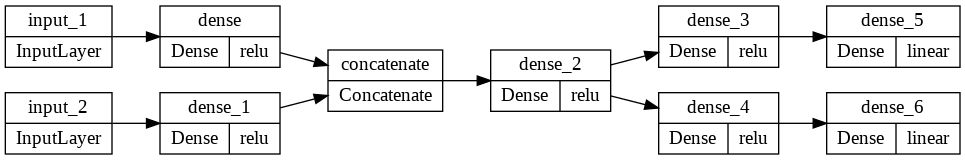

In [9]:
# Original pair-wise distances
dist_orig1 = np.square(euclidean_distances(x1, x1)).flatten()
dist_orig2 = np.square(euclidean_distances(x2, x2)).flatten()

In [10]:
num_clusters = len(np.unique(y))
recons={}
result_agl = {}
result_km = {}
seed = []

for i in range(10):
    print('#Run: ', i+1)
    
    sd = random.randint(0, 100)
    seed.append(sd)
    
    z_train, z_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=sd)
    #Autoencoder
    Encoder, SAE = ae.SAE(z_train, z_test, 128, 64, 98, 0.0001, 0.001, 25, 16)
    low_SAE = Encoder.predict(z)
    clusters_agl = AgglomerativeClustering(n_clusters= num_clusters).fit_predict(low_SAE)
    clusters_km = KMeans(n_clusters= num_clusters).fit_predict(low_SAE)
    
    #Pair-wise distances
    SAE_recons = SAE.predict(z)
    SAE_RNA = SAE_recons[:,0:x1.shape[1]]
    SAE_ADT = SAE_recons[:,x1.shape[1]:z.shape[1]]

    dist_SAE_RNA = np.square(euclidean_distances(SAE_RNA, SAE_RNA)).flatten()
    dist_SAE_ADT = np.square(euclidean_distances(SAE_ADT, SAE_ADT)).flatten()  
    
    #Reconstruction
    coef_SAE_RNA, p_SAE_RNA = pearsonr(dist_orig1, dist_SAE_RNA)
    coef_SAE_ADT, p_SAE_ADT = pearsonr(dist_orig2, dist_SAE_ADT)
    
    recons[i] = [coef_SAE_RNA, coef_SAE_ADT]
    result_agl[i] = [adjusted_rand_score(y[0], clusters_agl), fowlkes_mallows_score(y[0], clusters_agl)]
    result_km[i] = [adjusted_rand_score(y[0], clusters_km), fowlkes_mallows_score(y[0], clusters_km)]

#Run:  1
959/959 [==============================] - 2s 2ms/step
#Run:  2
959/959 [==============================] - 2s 2ms/step
#Run:  3
959/959 [==============================] - 2s 2ms/step
#Run:  4
959/959 [==============================] - 2s 2ms/step
#Run:  5
959/959 [==============================] - 2s 1ms/step
#Run:  6
959/959 [==============================] - 2s 2ms/step
#Run:  7
959/959 [==============================] - 2s 2ms/step
#Run:  8
959/959 [==============================] - 2s 2ms/step
#Run:  9
959/959 [==============================] - 2s 2ms/step
#Run:  10
959/959 [==============================] - 2s 2ms/step


In [11]:
r1 = [pd.DataFrame(np.ravel(recons[i])).T for i in range(len(recons))]
rec1 = pd.concat(r1)
rec1.index = range(len(recons))
rec1.columns = ['Pearson_RNA_SAE','Pearson_ADT_SAE']
rec1.loc[len(recons)] = rec1.mean(numeric_only=True, axis=0)
rec1.rename(index={len(recons):'avg'},inplace=True)
rec1

,Pearson_RNA_SAE,Pearson_ADT_SAE
0,0.741993,0.340621
1,0.814301,0.206727
2,0.771556,0.320693
3,0.773020,0.384097
4,0.609690,0.176779
5,0.750425,0.163268
6,0.542524,0.358986
7,0.671151,0.088331
8,0.782101,0.324633
9,0.725868,0.187929


In [12]:
r2 = [pd.DataFrame(np.ravel(result_agl[i])).T for i in range(len(result_agl))]
rec2 = pd.concat(r2)
rec2.index = range(len(result_agl))
rec2.columns = ['ARI_Agglomaretive','FMI_Agglomaretive']
rec2.loc[len(result_agl)] = rec2.mean(numeric_only=True, axis=0)
rec2.rename(index={len(result_agl):'avg'},inplace=True)
rec2

,ARI_Agglomaretive,FMI_Agglomaretive
0,0.061142,0.144820
1,0.067533,0.144303
2,0.054084,0.134690
3,0.176458,0.291744
4,0.049809,0.138834
5,0.149038,0.244601
6,0.097511,0.172092
7,0.032154,0.143452
8,0.136676,0.264415
9,0.083732,0.180065


In [13]:
r3 = [pd.DataFrame(np.ravel(result_km[i])).T for i in range(len(result_km))]
rec3 = pd.concat(r3)
rec3.index = range(len(result_km))
rec3.columns = ['ARI_KMeans','FMI_KMeans']
rec3.loc[len(result_km)] = rec3.mean(numeric_only=True, axis=0)
rec3.rename(index={len(result_km):'avg'},inplace=True)
rec3

,ARI_KMeans,FMI_KMeans
0,0.058001,0.137575
1,0.056344,0.131224
2,0.041987,0.118768
3,0.171782,0.286817
4,0.050428,0.134465
5,0.154923,0.253576
6,0.097920,0.172152
7,0.035246,0.144736
8,0.131193,0.253033
9,0.070417,0.166973
